In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 42.5 MB/s eta 0:00:00


In [ ]:
import rasterio
img = rasterio.open('/content/drive/MyDrive/landcovers_2560_cropped/landcover_2_2020.tif')
img.shape

(2560, 2560)

In [ ]:
import PIL
img = PIL.Image.open('/content/drive/MyDrive/LEVIR-CD /A/patch_1_0_3.png')
img.mode

'RGB'

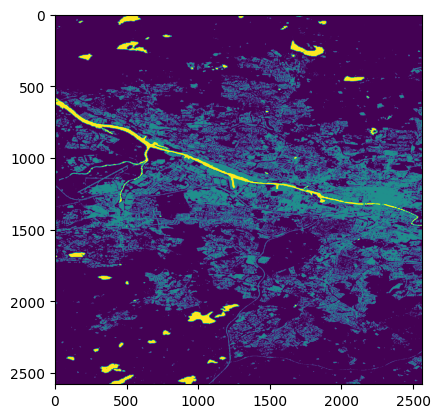

In [ ]:
from matplotlib import pyplot
pyplot.imshow(img.read(1))
pyplot.show()

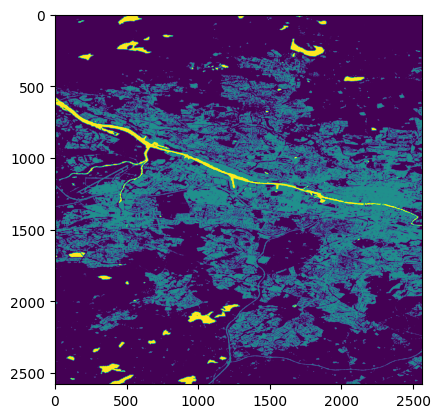

In [ ]:
img_1 = rasterio.open('/content/drive/MyDrive/landcovers_2560/landcover_1_2021.tif')
pyplot.imshow(img_1.read(1))
pyplot.show()

In [ ]:
from rasterio.windows import Window
from PIL import Image
import numpy as np
import os
def crop_tiff_to_size(tiff_path, output_path, target_size):
    with rasterio.open(tiff_path) as src:
        width = src.width
        height = src.height

        # Calculate cropping window
        start_x = (width - target_size) // 2
        start_y = (height - target_size) // 2
        window = Window(start_x, start_y, target_size, target_size)

        # Read data from window
        data = src.read(window=window)

        # Update metadata for new size
        kwargs = src.meta.copy()
        kwargs.update({
            'height': target_size,
            'width': target_size,
            'transform': src.window_transform(window)
        })

        # Write cropped data to new file
        with rasterio.open(output_path, 'w', **kwargs) as dst:
            dst.write(data)

        print(f"Cropped TIFF saved to {output_path}")

# Path to the original TIFF file
original_tiff_path = '/content/drive/MyDrive/landcovers_2560/landcover_1_2020.tif'

# Path to save the cropped TIFF file
cropped_tiff_path = '/content/drive/MyDrive/landcovers_2560_cropped/landcover_1_2020.tif'
target_size = 2560

# Crop TIFF
crop_tiff_to_size(original_tiff_path, cropped_tiff_path, target_size)

Cropped TIFF saved to /content/drive/MyDrive/landcovers_2560_cropped/landcover_1_2020.tif


In [ ]:
img = rasterio.open('/content/drive/MyDrive/sentinel_2560/sentinel_4_2020.tif')
img.shape

(2580, 2561)

In [ ]:
original_tiff_path = '/content/drive/MyDrive/sentinel_2560/sentinel_9_2021.tif'
cropped_tiff_path = '/content/drive/MyDrive/sentinel_2560_cropped/sentinel_9_2021.tif'
target_size = 2560
crop_tiff_to_size(original_tiff_path, cropped_tiff_path, target_size)

Cropped TIFF saved to /content/drive/MyDrive/sentinel_2560_cropped/sentinel_9_2021.tif


In [ ]:
from rasterio.windows import Window
from PIL import Image
import numpy as np
import os

patch_size = 256  # Patch size in pixels

def create_png_patches(tiff_path, output_dir, patch_size,image_num):
    with rasterio.open(tiff_path) as src:
        width = src.width
        height = src.height

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Calculate number of patches
        num_patches_x = int(np.ceil(width / patch_size))
        num_patches_y = int(np.ceil(height / patch_size))

        for i in range(num_patches_x):
            for j in range(num_patches_y):
                # Calculate the window coordinates
                window = Window(i * patch_size, j * patch_size, patch_size, patch_size)
                # Read the patch data
                patch_data = src.read(window=window)

                # Print the dimensions of the patch
                patch_height, patch_width = patch_data.shape[1], patch_data.shape[2]
                print(f"Patch {i}_{j} dimensions: {patch_width}x{patch_height}")
                # Convert the patch to an image format
                patch_data = np.moveaxis(patch_data, 0, -1)  # Convert from (bands, height, width) to (height, width, bands)

                # If patch_data has more than 3 bands, take only the first 3 for RGB
                if patch_data.shape[2] > 3:
                    patch_data = patch_data[:, :, :3]

                # Convert to 8-bit image (0-255) if necessary
                if patch_data.dtype != np.uint8:
                    patch_data = np.uint8(patch_data / np.max(patch_data) * 255)
                # Create and save the patch image
                patch_image = Image.fromarray(patch_data)
                patch_filename = os.path.join(output_dir, f"patch_{image_num}_{i}_{j}.png")
                patch_image.save(patch_filename)
                print(f"Saved {patch_filename}")

tiff_path = '/content/drive/MyDrive/sentinel_2560_cropped/sentinel_1_2020.tif'

output_dir = '/content/drive/MyDrive/data_2560/A'
create_png_patches(tiff_path, output_dir, patch_size,1)


Patch 0_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_0.png
Patch 0_1 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_1.png
Patch 0_2 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_2.png
Patch 0_3 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_3.png
Patch 0_4 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_4.png
Patch 0_5 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_5.png
Patch 0_6 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_6.png
Patch 0_7 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_7.png
Patch 0_8 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_8.png
Patch 0_9 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0_9.png
Patch 1_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_1_0.png
Patch 1_1 dimensions: 256x256
Saved /conten

In [ ]:
tiff_paths = [f'/content/drive/MyDrive/sentinel_2560_cropped/sentinel_{i}_2020.tif' for i in range(1, 10)]

# Loop through each TIFF file and generate patches
for idx, tiff_path in enumerate(tiff_paths, start=1):
    output_dir = f'/content/drive/MyDrive/data_2560/A/set_{idx}'  # Change output directory for each set
    create_png_patches(tiff_path, output_dir, patch_size)

Patch 0_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_0.png
Patch 0_1 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_1.png
Patch 0_2 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_2.png
Patch 0_3 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_3.png
Patch 0_4 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_4.png
Patch 0_5 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_5.png
Patch 0_6 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_6.png
Patch 0_7 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_7.png
Patch 0_8 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_8.png
Patch 0_9 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_0_9.png
Patch 1_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_1_0.png
Patch 1_1 dimensions: 256x256
Saved /content/drive/MyDrive/data_2

In [ ]:
tiff_path = '/content/drive/MyDrive/sentinel_2560_cropped/sentinel_9_2020.tif'

output_dir = '/content/drive/MyDrive/data_2560/A'
create_png_patches(tiff_path, output_dir, patch_size,9)

Patch 0_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_0.png
Patch 0_1 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_1.png
Patch 0_2 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_2.png
Patch 0_3 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_3.png
Patch 0_4 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_4.png
Patch 0_5 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_5.png
Patch 0_6 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_6.png
Patch 0_7 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_7.png
Patch 0_8 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_8.png
Patch 0_9 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_0_9.png
Patch 1_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/A/patch_9_1_0.png
Patch 1_1 dimensions: 256x256
Saved /conten

In [ ]:
tiff_paths = [f'/content/drive/MyDrive/sentinel_2560_cropped/sentinel_{i}_2021.tif' for i in range(1, 10)]

# Loop through each TIFF file and generate patches
for idx, tiff_path in enumerate(tiff_paths, start=1):
    output_dir = f'/content/drive/MyDrive/data_2560/B'  # Change output directory for each set
    create_png_patches(tiff_path, output_dir, patch_size,idx)

Patch 0_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_0.png
Patch 0_1 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_1.png
Patch 0_2 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_2.png
Patch 0_3 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_3.png
Patch 0_4 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_4.png
Patch 0_5 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_5.png
Patch 0_6 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_6.png
Patch 0_7 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_7.png
Patch 0_8 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_8.png
Patch 0_9 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_0_9.png
Patch 1_0 dimensions: 256x256
Saved /content/drive/MyDrive/data_2560/B/patch_1_1_0.png
Patch 1_1 dimensions: 256x256
Saved /conten

In [ ]:
import rasterio
def load_landcover(file_path):
    with rasterio.open(file_path) as src:
        landcover_data = src.read()  # Read all bands
    return landcover_data
# Load landcover data for 2020 and 2021
landcover_4_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_4_2020.tif')
landcover_4_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_4_2021.tif')
landcover_5_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_5_2020.tif')
landcover_5_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_5_2021.tif')
landcover_6_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_6_2020.tif')
landcover_6_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_6_2021.tif')
landcover_7_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_7_2020.tif')
landcover_7_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_7_2021.tif')
landcover_8_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_8_2020.tif')
landcover_8_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_8_2021.tif')
landcover_9_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_9_2020.tif')
landcover_9_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_9_2021.tif')

In [ ]:
import numpy as np
landcover_2020 = np.squeeze(landcover_9_2020, axis=0)
landcover_2021 = np.squeeze(landcover_9_2021, axis=0)
change_labels = np.abs(landcover_2020 -landcover_2021)
change_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
patch_labels_binary = np.where(change_labels > 0, 255, 0).astype(np.uint8)

In [ ]:
import cv2
def save_change_map(change_map, output_path):
    """Save the change map to a file."""
    cv2.imwrite(output_path, change_map)

In [ ]:
output_path = '/content/drive/MyDrive/Change Maps New/change_map_9.png'
save_change_map(patch_labels_binary,output_path)

In [ ]:
import numpy as np
from PIL import Image
import os
import cv2

def save_labels_for_patches(patch_size, output_labels_dir, change_labels,num_region):
    # Remove the band dimension if it exists
    if len(change_labels.shape) == 3:
        change_labels = np.squeeze(change_labels, axis=0)

    num_patches_x = int(np.ceil(change_labels.shape[1] / patch_size))
    num_patches_y = int(np.ceil(change_labels.shape[0] / patch_size))

    os.makedirs(output_labels_dir, exist_ok=True)

    for i in range(num_patches_x):
        for j in range(num_patches_y):
            x_start = i * patch_size
            x_end = min((i + 1) * patch_size, change_labels.shape[1])
            y_start = j * patch_size
            y_end = min((j + 1) * patch_size, change_labels.shape[0])

            patch_labels = change_labels[y_start:y_end, x_start:x_end]

            # Convert to binary change map: 255 for change, 0 for no change
            patch_labels_binary = np.where(patch_labels > 0, 255, 0).astype(np.uint8)
            patch_filename = os.path.join(output_labels_dir, f"patch_{num_region}_{i}_{j}.png")

            cv2.imwrite(patch_filename, patch_labels_binary)

           # patch_image = Image.fromarray(patch_labels_binary, mode='L')  # 'L' mode for grayscale images

            #patch_image.save(patch_filename)
            print(f"Saved {patch_filename}")

def generate_change_labels(landcover_2020, landcover_2021):
    if len(landcover_2020.shape) == 3:
        landcover_2020 = np.squeeze(landcover_2020, axis=0)
    if len(landcover_2021.shape) == 3:
        landcover_2021 = np.squeeze(landcover_2021, axis=0)

    # Calculate change labels (difference between the two landcovers)
    change_labels = np.abs(landcover_2021 - landcover_2020)

    return change_labels

# Generate change labels
change_labels = generate_change_labels(landcover_9_2020, landcover_9_2021)

# Save labels for patches with binary representation
save_labels_for_patches(256, '/content/drive/MyDrive/LEVIR-CD/label', change_labels,9)

Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_0.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_1.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_2.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_3.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_4.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_5.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_6.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_7.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_8.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_0_9.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_1_0.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_1_1.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_1_2.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_1_3.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_1_4.png
Saved /content/drive/MyDrive/LEVIR-CD/label/patch_9_1_5.png
Saved /content/drive/MyDrive/LEVIR-CD/la

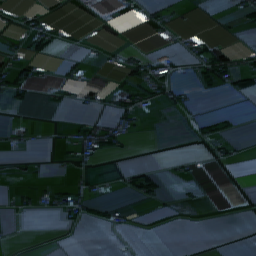

In [ ]:
import PIL
PIL.Image.open('/content/drive/MyDrive/LEVIR-CD/A/patch_3_0_3.png')

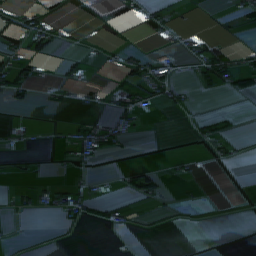

In [ ]:
PIL.Image.open('/content/drive/MyDrive/LEVIR-CD/B/patch_3_0_3.png')

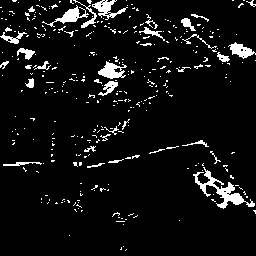

In [ ]:
PIL.Image.open('/content/drive/MyDrive/LEVIR-CD/label/patch_3_0_3.png')

In [ ]:
landcover_9_2020, transform_9_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_9_2020.tif')
landcover_9_2021, transform_9_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_9_2021.tif')
change_labels = generate_change_labels(landcover_9_2020, landcover_9_2021)

save_labels_for_patches(256, '/content/drive/MyDrive/data_2560/labels', change_labels,9)

Saved /content/drive/MyDrive/data_2560/labels/label_9_0_0.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_1.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_2.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_3.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_4.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_5.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_6.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_7.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_8.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_0_9.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_1_0.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_1_1.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_1_2.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_1_3.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_1_4.png
Saved /content/drive/MyDrive/data_2560/labels/label_9_1_5.png
Saved /c

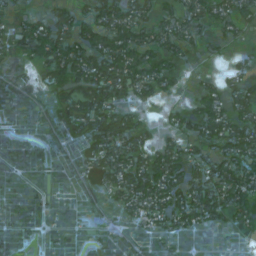

In [ ]:
import PIL
PIL.Image.open('/content/drive/MyDrive/data_2560/A/patch_9_7_0.png')

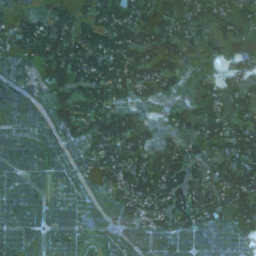

In [ ]:
PIL.Image.open('/content/drive/MyDrive/data_2560/B/patch_9_7_0.png')

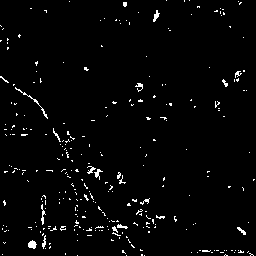

In [ ]:
PIL.Image.open('/content/drive/MyDrive/data_2560/labels/label_9_7_0.png')